In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Homework 2.1.1 - 1D Wave

Solve the wave equation

$$\frac{{{\partial ^2}u}}{{\partial {t^2}}} = c^2 \frac{{{\partial ^2}u}}{{\partial {x^2}}}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)** and **the frequency ($\omega$)** to make a nice time-animated graph video clip.

In [4]:
import matplotlib.animation as animation

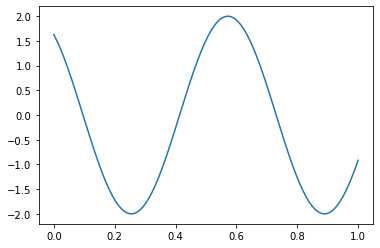

In [15]:
# Ux0
n = 100
l = 1.
c = 100
w = 0.1
xs = np.linspace(0, l, n, endpoint=True)
Ux0 = np.zeros(101)
Ux0[0] = 2*math.sin(w*0)

Uold = Ux0

dUx0 = np.zeros(n+1)

dt = 1e-4
dh = l/n
eps = ((dt*c/dh)**2)

Uxj = np.zeros(101)

Uall = np.array([Uxj[:n]])

for j in range(200):
    Unew = np.zeros(101)
    Unew[0] = 2*math.sin(w*j)
    
    for i in np.linspace(1, n-1, n-1, dtype=int):
        Unew[i] = eps*(Uxj[i+1] + Uxj[i-1]) + 2.*(1. - eps)*Uxj[i] - Uold[i]
    Unew[n-1] =  -c*dt*(Uxj[n] - Uxj[n-2])/dh + Uold[n]
    Uold =Uxj
    Uxj = Unew
    Uall = np.vstack([Uall, Unew[:n]])

def update_linex(num, line):
    line.set_data(xs, Uall[num])
    return line,

fig1 = plt.figure()
ll = plt.plot(xs, Uxj[:n])
line_ani = animation.FuncAnimation(fig1, update_linex, 200, fargs=(ll), interval=20, blit=True)
line_ani.save('wave-in-string.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

___
### Homework 2.1.2 - 1D Wave with damping

Solve the wave equation

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} - k \frac{\partial u}{\partial t}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)**, **the frequency ($\omega$)**, and **the damping factor ($k$)** to make a nice time-animated graph video clip.

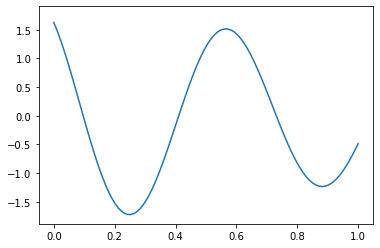

In [16]:
# Ux0
n = 100
l = 1.
c = 100
w = 0.1
xs = np.linspace(0, l, n, endpoint=True)

Ux0 = np.zeros(101)
Ux0[0] = 2*math.sin(w*0)

k = 100
Uold = Ux0

dUx0 = np.zeros(n+1)

dt = 1e-4
dh = l/n
eps = ((dt*c/dh)**2)

Uxj = np.zeros(101)

Uall = np.array([Uxj[:n]])

for j in range(200):
    Unew = np.zeros(101)
    Unew[0] = 2*math.sin(w*j)
    for i in np.linspace(1, n-1, n-1, dtype=int):
        Unew[i] = (1/(2+k*dt))*(2*dt**2*(c**2*(Uxj[i+1] - 2*Uxj[i] + Uxj[i-1]))/dh**2 + 4*Uxj[i] - 2*Uold[i] + Uold[i]*k*dt)
    Unew[n-1] =  -c*dt*(Uxj[n] - Uxj[n-2])/dh + Uold[n]
    Uold =Uxj
    Uxj = Unew
    Uall = np.vstack([Uall, Unew[:n]])

fig1 = plt.figure()
ll = plt.plot(xs, Uxj[:n])
line_ani = animation.FuncAnimation(fig1, update_linex, 200, fargs=(ll), interval=20, blit=True)
line_ani.save('damping-wave.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()